<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/MachineLearning_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(close=None, block=None)>

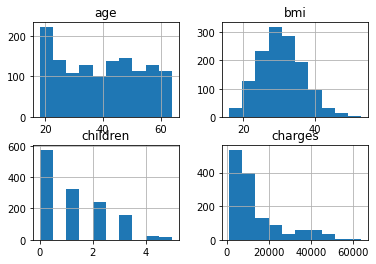

In [2]:
#Insurance
import pandas as pd
import matplotlib.pyplot as plt
url = 'insurance.csv'
data = pd.read_csv(url)
data.hist()
plt.show

In [3]:
correlation = data.corr()
print(correlation)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


<AxesSubplot:>

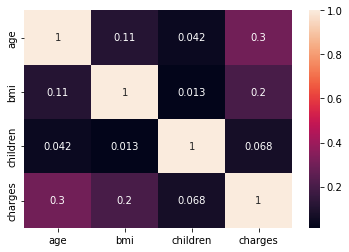

In [4]:
import seaborn as sns
sns.heatmap(correlation, annot = True)

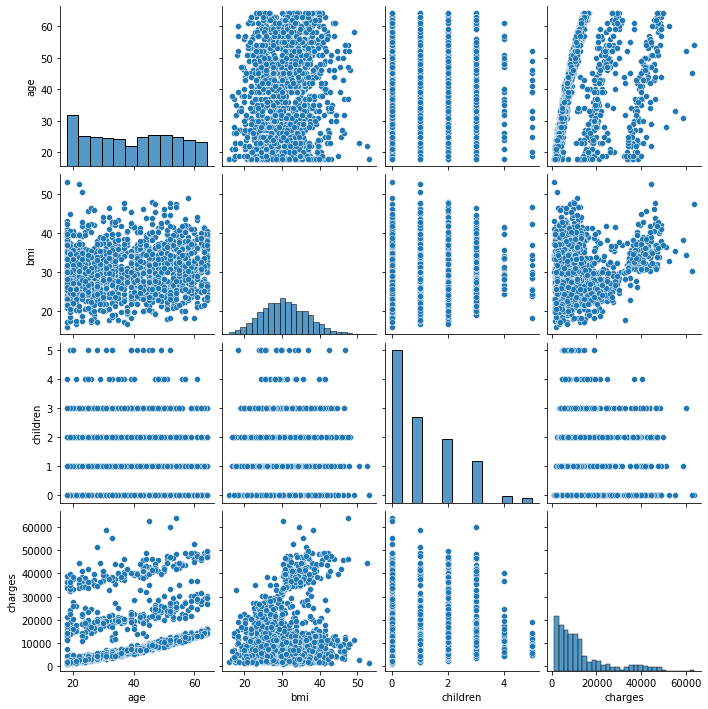

In [5]:
sns.pairplot(data)

<AxesSubplot:xlabel='age', ylabel='charges'>

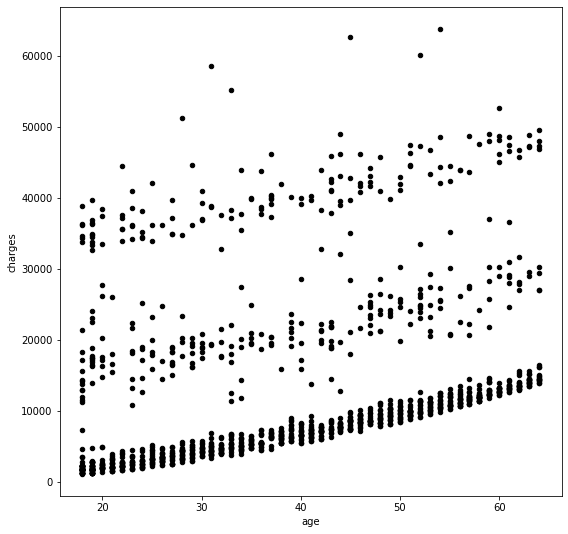

In [6]:
# charges phụ thuộc vào age lớn nhất 0.299
data.plot(kind = 'scatter', x = 'age', y = 'charges', figsize=(9,9), 
          color = 'black')

Intercept của mô hình:  3165.885006063021
Coeffient của mô hình:  [257.72261867]
Độ chính xác của mô hình:  0.08940589967885804


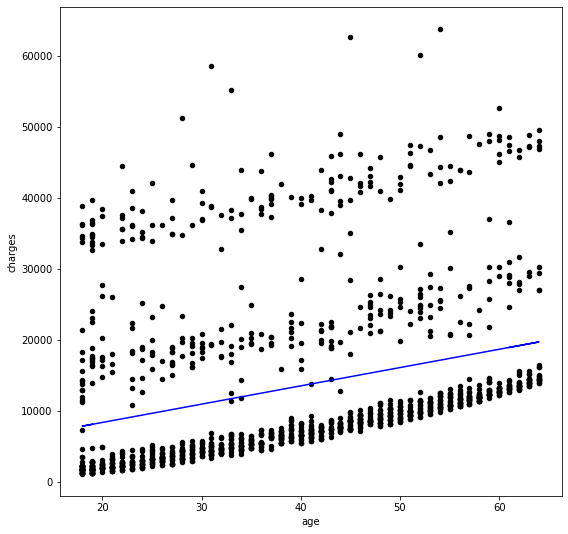

In [7]:
#Mô hình bậc 1
from sklearn import linear_model
model = linear_model.LinearRegression()
X = pd.DataFrame(data['age'])
model.fit(X, y = data['charges'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X,y = data['charges']))
data.plot(kind = 'scatter', x = 'age', y = 'charges', figsize=(9,9),
          color = 'black')
y_pred = model.predict(X)
plt.plot(X,y_pred, color = 'blue')

Intercept của mô hình:  6508.552679699116
Coeffient của mô hình:  [64.57305277  2.43890871]
Độ chính xác của mô hình:  0.09059354818621057


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


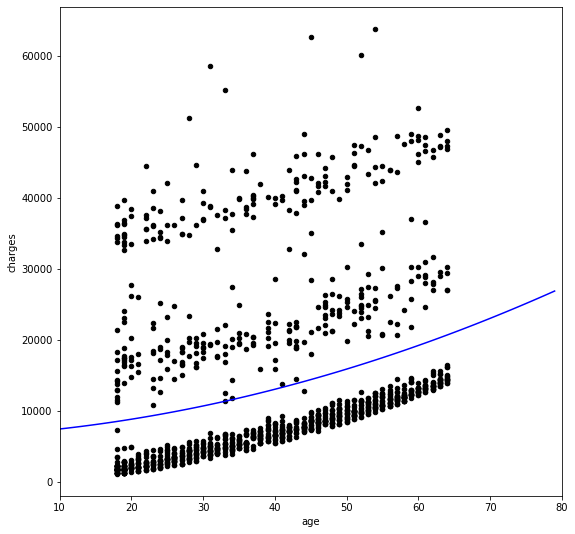

In [10]:
#Mô hình bậc 2
from sklearn import linear_model
model = linear_model.LinearRegression()
X = pd.DataFrame([data['age'], data['age']**2]).T
model.fit(X, y = data['charges'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', 
      model.score(X,y = data['charges']))

import numpy as np
range = np.arange(10,80,1)
data.plot(kind = 'scatter', x = 'age', y = 'charges', figsize=(9,9),
                 color = 'black', xlim=(10,80))
predictor = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X = predictor)
plt.plot(range,y_pred, color = 'blue')

Intercept của mô hình:  4285.077012636684
Coeffient của mô hình:  [ 8.51121953e-05  2.98133979e-03  2.74474932e-02  1.94442924e-01
 -1.39022092e-02  2.44648893e-04  5.53788284e-06 -2.64503170e-07
  3.53961048e-09 -1.63107830e-11]
Độ chính xác của mô hình:  0.09268754392926282


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


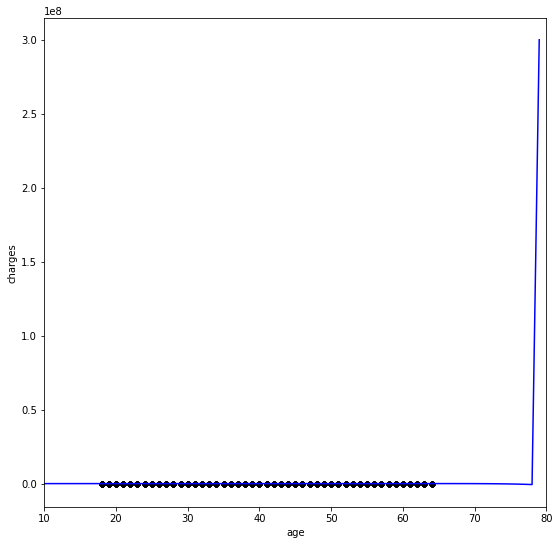

In [15]:
#Mô hình bậc 10
from sklearn import linear_model
model = linear_model.LinearRegression()
X = pd.DataFrame([data['age'], data['age']**2, data['age']**3,
                  data['age']**4, data['age']**5, data['age']**6, 
                  data['age']**7, data['age']**8, data['age']**9, 
                  data['age']**10]).T
model.fit(X, y = data['charges'])
print('Intercept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', 
      model.score(X,y = data['charges']))

import numpy as np
range = np.arange(10,80,1)
data.plot(kind = 'scatter', x = 'age', y = 'charges', figsize=(9,9),
                 color = 'black', xlim=(10,80))
predictor = pd.DataFrame([range, range**2, range**3, range**4, range**5, 
                          range**6, range**7, range**8, range**9, range**10]).T
y_pred = model.predict(X = predictor)
plt.plot(range,y_pred, color = 'blue')

<function matplotlib.pyplot.show(close=None, block=None)>

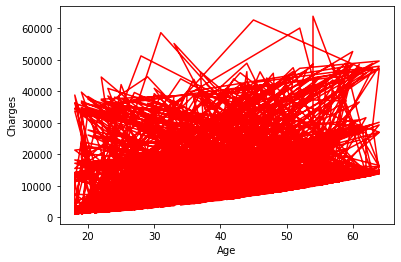

In [16]:
# Nối cái điểm dữ liệu
X = pd.DataFrame(data['age'])
y = data['charges']
plt.plot(X,y,'r')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show